# Comparing label_overlap_matrix with confusion_matrix
We're searching for an efficient way to compute overlap between label images. Thus, for testing we create two label images and compute these overlap-matrices. With increasing image size, different methods perform quite differently.

In [1]:
from sklearn.metrics import confusion_matrix
from biapol_utilities import label_overlap_matrix, labels_colormap
import numpy as np
from skimage.io import imshow
import timeit

C:\Users\rober\miniconda3\envs\bio_38\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


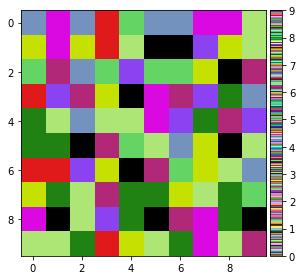

In [2]:
labels_a = np.random.randint(0, 10, (10, 10))
imshow(labels_a, cmap=labels_colormap())

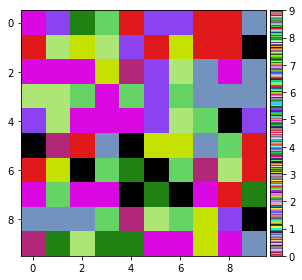

In [3]:
labels_b = np.random.randint(0, 10, (10, 10))
imshow(labels_b, cmap=labels_colormap())

In [4]:
sklearn_confusion_matrix = confusion_matrix(labels_a.ravel(), labels_b.ravel())
sklearn_confusion_matrix

array([[1, 1, 1, 1, 1, 1, 0, 0, 2, 2],
       [2, 1, 0, 1, 1, 1, 2, 2, 2, 1],
       [1, 1, 1, 2, 0, 2, 1, 0, 1, 2],
       [0, 1, 1, 1, 0, 3, 0, 2, 0, 1],
       [1, 1, 1, 2, 2, 6, 1, 1, 0, 1],
       [0, 0, 2, 1, 1, 0, 0, 3, 0, 2],
       [2, 0, 0, 3, 0, 2, 0, 0, 3, 0],
       [1, 0, 0, 1, 2, 0, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 0, 2, 0, 0, 0, 1, 1]], dtype=int64)

In [5]:
biapol_confusion_matrix = label_overlap_matrix(labels_a, labels_b)
biapol_confusion_matrix

array([[1, 1, 1, 1, 1, 1, 0, 0, 2, 2],
       [2, 1, 0, 1, 1, 1, 2, 2, 2, 1],
       [1, 1, 1, 2, 0, 2, 1, 0, 1, 2],
       [0, 1, 1, 1, 0, 3, 0, 2, 0, 1],
       [1, 1, 1, 2, 2, 6, 1, 1, 0, 1],
       [0, 0, 2, 1, 1, 0, 0, 3, 0, 2],
       [2, 0, 0, 3, 0, 2, 0, 0, 3, 0],
       [1, 0, 0, 1, 2, 0, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 0, 2, 0, 0, 0, 1, 1]], dtype=uint32)

In [6]:
# Are they equal?
np.array_equal(sklearn_confusion_matrix, biapol_confusion_matrix)

True

In [7]:
# for time measurements, we make the same input to both
labels_a = labels_a.ravel()
labels_b = labels_b.ravel()

In [8]:
%timeit confusion_matrix(labels_a, labels_b)

233 µs ± 28.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
%timeit label_overlap_matrix(labels_a, labels_b)

287 µs ± 1.03 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
# now let's try with larger label images: 4 MB
labels_a = np.random.randint(0, 10, (1024, 1024, 2)).ravel()
labels_b = np.random.randint(0, 10, (1024, 1024, 2)).ravel()

In [11]:
%timeit confusion_matrix(labels_a, labels_b)

281 ms ± 288 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit label_overlap_matrix(labels_a, labels_b)

5.72 s ± 177 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
# now let's try with even larger label images: 40 MB
labels_a = np.random.randint(0, 10, (1024, 1024, 20)).ravel()
labels_b = np.random.randint(0, 10, (1024, 1024, 20)).ravel()

In [14]:
%timeit confusion_matrix(labels_a, labels_b)

2.45 s ± 27.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%timeit label_overlap_matrix(labels_a, labels_b)

52.5 s ± 1.29 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
